In [133]:
#!pip install matplotlib==3.2.1

### Podejscie funkcyjne

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [135]:
%matplotlib inline

In [136]:
x=np.arange(11)
y=x**2

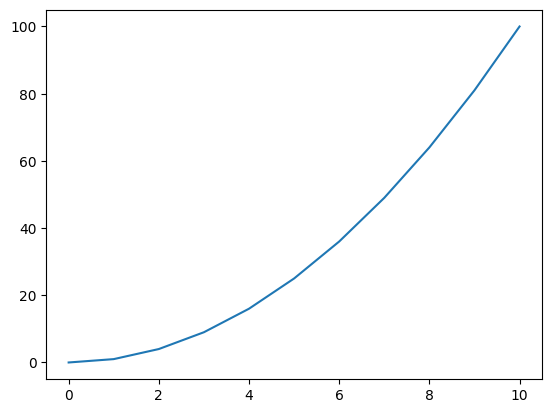

In [137]:
plt.plot(x,y)
plt.show()

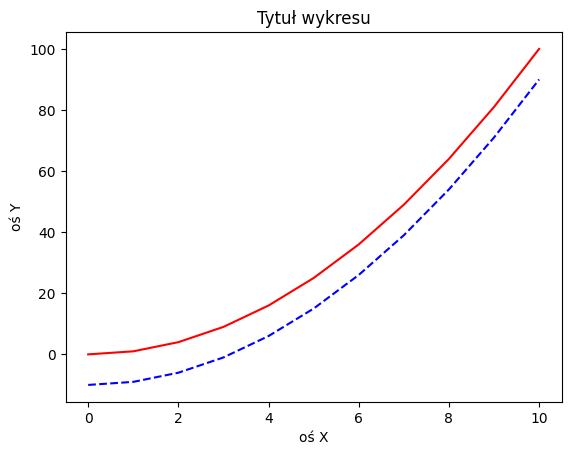

In [138]:
plt.plot(x,y,color='red') # zmieniamy kolor poprzedniej linii
plt.plot(x,y-10,color='blue',ls='dashed') #dodajemy 2 linie przerywana niebieska
plt.xlabel('oś X') # opis osi X
plt.ylabel('oś Y') #dodajemy opis osi Y
plt.title('Tytuł wykresu') # tytuła
plt.show()

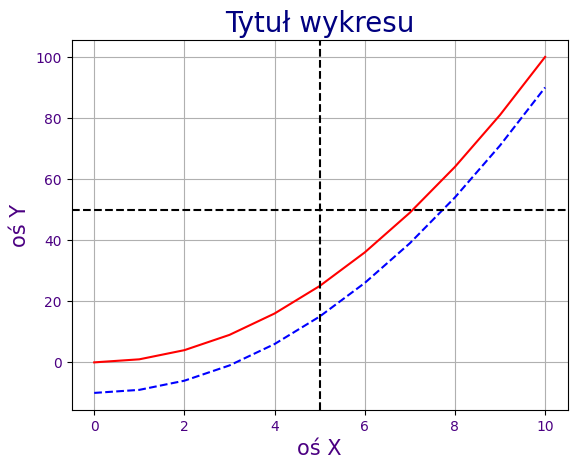

In [139]:
plt.plot(x,y, color='red')#zmieniam kolor poprzedniej lini
plt.plot(x,y-10,color='blue',ls='dashed') #dodajemy 2 inie
plt.xlabel('oś X', size=15, color='indigo')
plt.ylabel('oś Y', size=15, color='indigo') # dodajemy opis osi Y
plt.title('Tytuł wykresu', size=20, color='navy') # dodajemy tytuł wykresu
plt.xticks(color='indigo')
plt.yticks(color='indigo')
plt.grid()
plt.axhline(y=50, color='k', linestyle='--')
plt.axvline(x=5, color='k', linestyle='--')
plt.show()

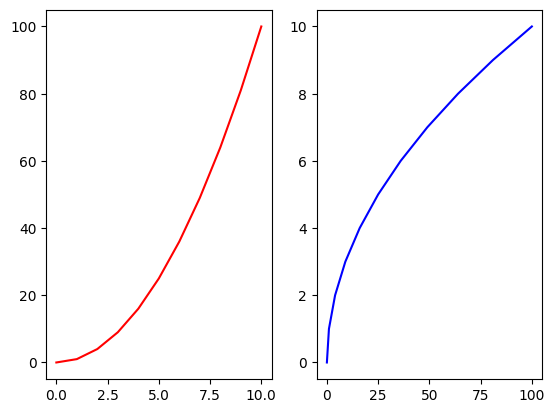

In [140]:
plt.subplot(1,2,1)
plt.plot(x,y,color='red')

plt.subplot(1,2,2)
plt.plot(y,x,color='blue')

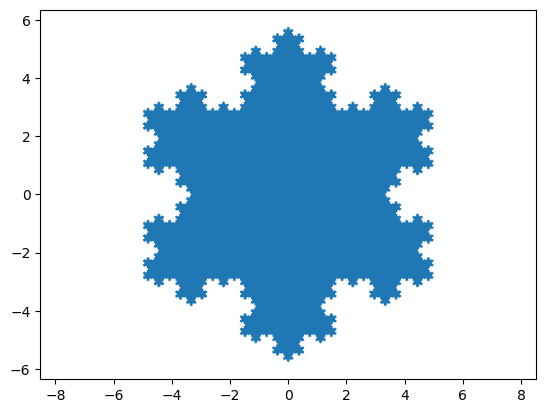

In [141]:
def koch_snowflake(order, scale=10):

    """
    Return two lists x, y of point coordinates of the Koch snowflake.
    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """

    def _koch_snowflake_complex(order):
        if order == 0:

            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)

        else:

            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors
            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2

            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)
plt.fill(x, y)
plt.axis('equal')
plt.show()

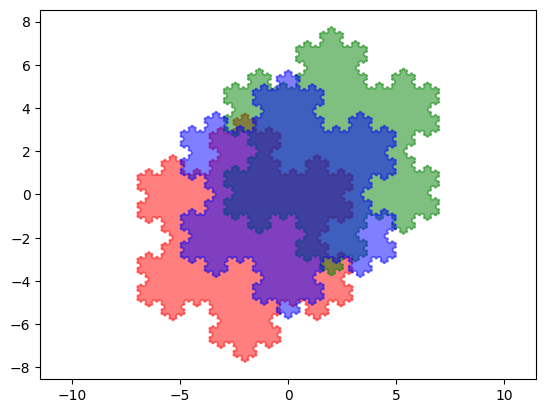

In [142]:
plt.fill(x-2, y-2, color='red', alpha=0.5)
plt.fill(x+2, y+2, color='green', alpha=0.5)
plt.fill(x, y, color='blue', alpha=0.5)
plt.axis('equal')
plt.show()

In [143]:
rand_arr = np.random.randint(1,1000,2000).reshape(1000,2)

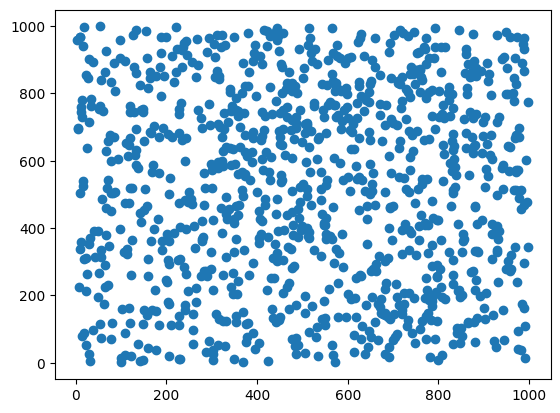

In [144]:
plt.scatter(rand_arr[:,0],rand_arr[:,1])

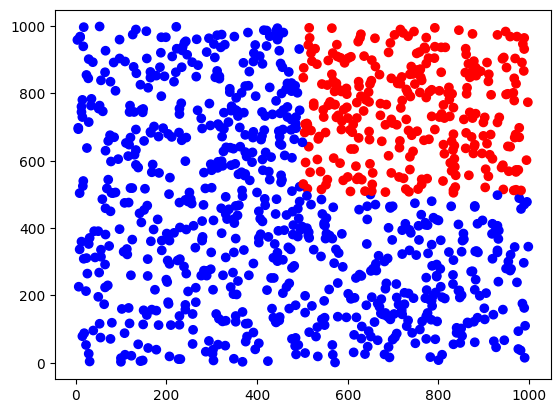

In [145]:
cmap = np.empty(rand_arr.shape,dtype='object')
cmap[:] = 'blue'
cmap[rand_arr.min(axis=1)>500] = 'red'
plt.scatter(rand_arr[:,0],rand_arr[:,1],c=cmap[:,0])

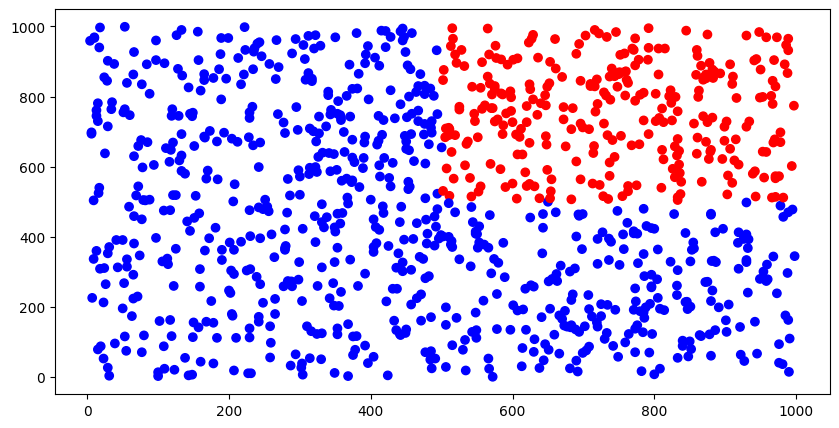

In [146]:
plt.figure(figsize=(10,5))
plt.scatter(rand_arr[:,0],rand_arr[:,1],c=cmap[:,0])

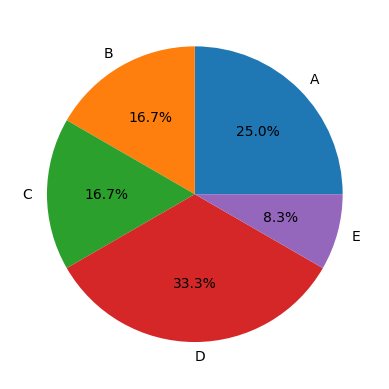

In [147]:
pie_data = np.array([30,20,20,40,10])
labels = ['A','B','C','D','E']
plt.pie(pie_data,labels=labels,autopct='%1.1f%%')
plt.show()

### Podejscie obiektowe

Text(0.5, 1.0, 'Tytuł wykresu')

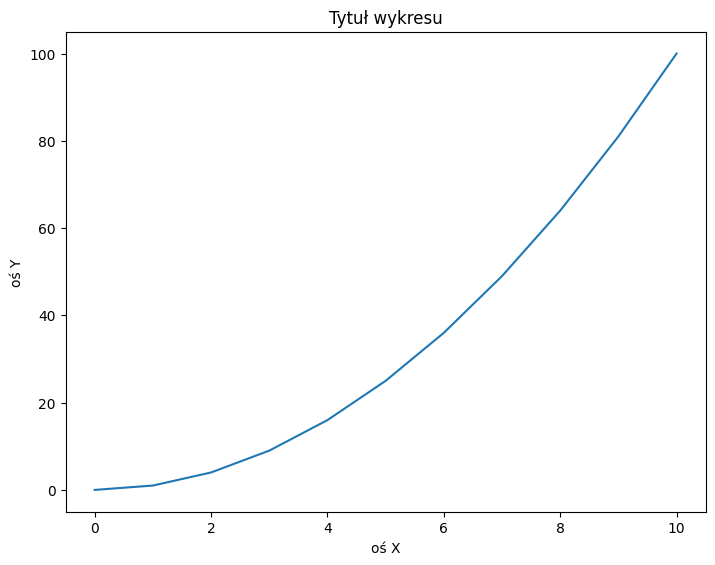

In [148]:
fig = plt.figure()
axes=fig.add_axes([0,0,1,1])
x = np.arange(11)
y = x ** 2
axes.plot(x,y)
axes.set_xlabel('oś X')
axes.set_ylabel('oś Y')
axes.set_title('Tytuł wykresu')

Text(0.5, 0, 'Random')

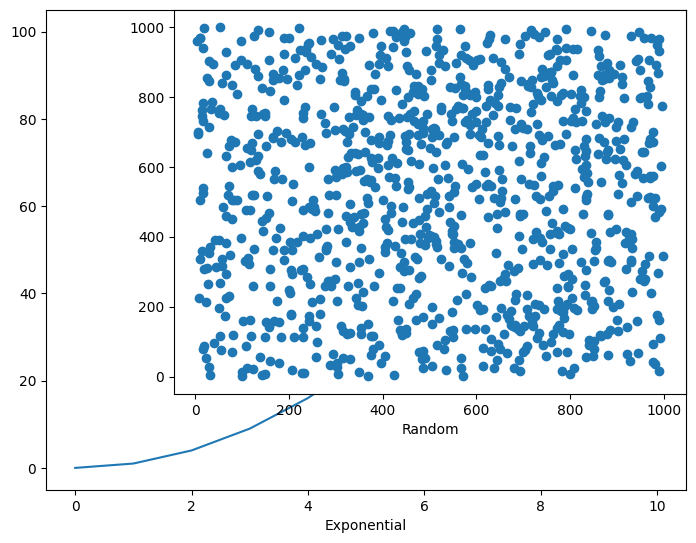

In [149]:
fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([.2,.2,.8,.8])
axes1.plot(x,y)
axes2.scatter(rand_arr[:,0],rand_arr[:,1])
axes1.set_xlabel('Exponential')
axes2.set_xlabel('Random')


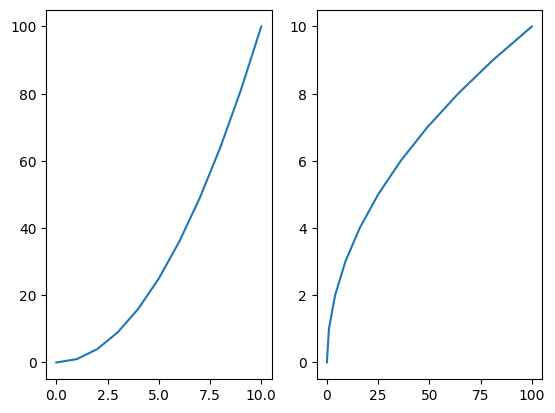

In [150]:
fig,axes = plt.subplots(nrows=1,ncols=2)
axes[0].plot(x,y)
axes[1].plot(y,x)

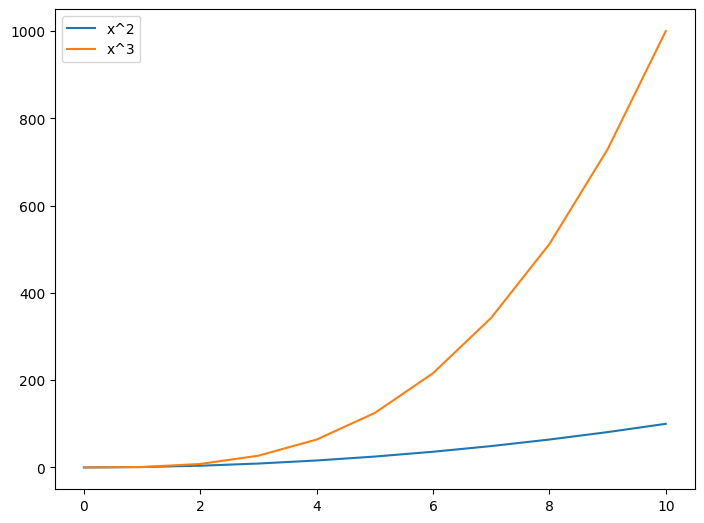

In [151]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x,x**2,label='x^2')
axes.plot(x,x**3,label='x^3')

axes.legend(loc=0)

### Formatowaniie wykresów

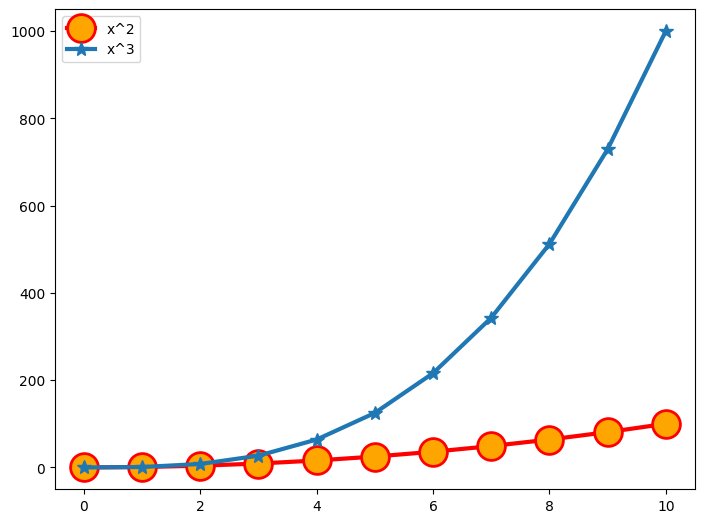

In [152]:

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x,x**2,label='x^2',
          color='red',
          linewidth=3,
          marker='o',
          markersize=20,
          markerfacecolor='orange',
          markeredgewidth=2)
axes.plot(x,x**3,label='x^3',linewidth=3,
          marker='*',
          markersize=10)

axes.legend(loc=0)

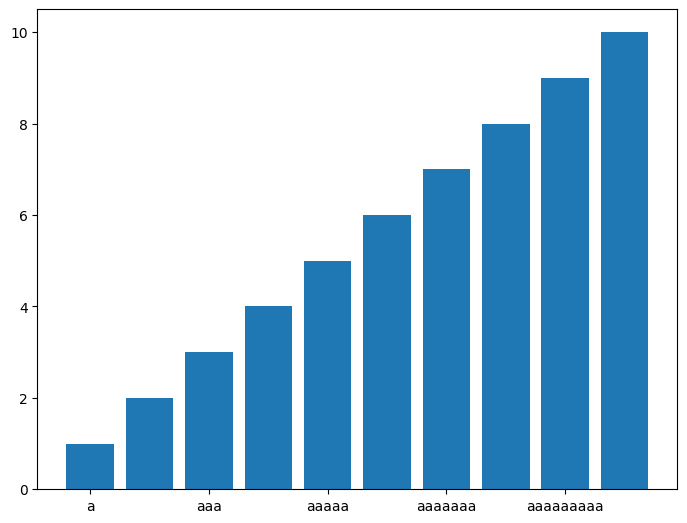

In [153]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(np.array(['a'*n for n in range(1,11)]),np.arange(1,11))
axes.xaxis.set_major_locator(plt.MaxNLocator(7))

In [154]:
axes.xaxis.set_major_locator(plt.MaxNLocator(7))

<BarContainer object of 4 artists>

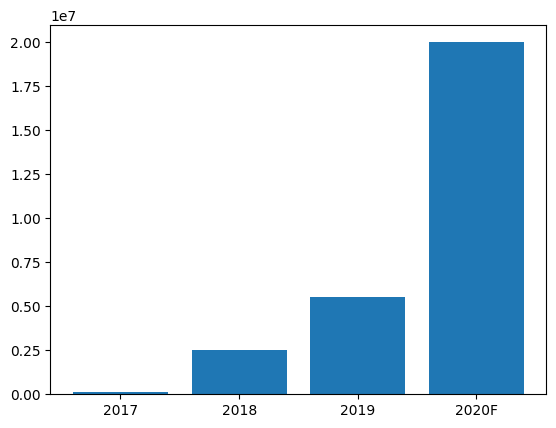

In [155]:
fig, ax = plt.subplots()

years = np.array(['2017','2018','2019','2020F'])
revenues = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

ax.bar(years, revenues)

In [156]:
def million(x, pos):
        return 'PLN {:2.1f}M'.format(x*1e-6)

<BarContainer object of 4 artists>

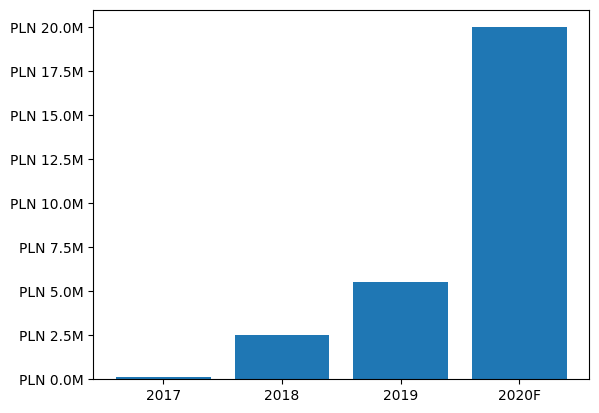

In [157]:
fig, ax = plt.subplots()

years = np.array(['2017','2018','2019','2020F'])
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.bar(years, money)

<BarContainer object of 4 artists>

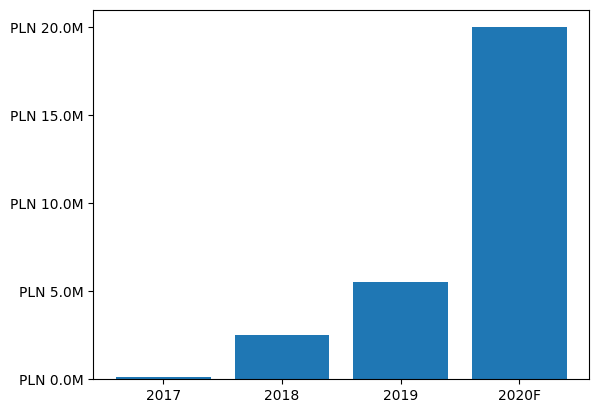

In [158]:
fig, ax = plt.subplots()

years = np.array(['2017','2018','2019','2020F'])
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(plt.MultipleLocator(5e6))

ax.bar(years, money)

Wbudowana wizualizacja danych w Pandas

In [159]:
import datetime as dt
df = pd.DataFrame({'A':np.random.randn(200),
                 'B':[dt.datetime(2019,1,1)+dt.timedelta(days=x) for x in range(200)],
                  'C':np.arange(1,201)})

<Axes: >

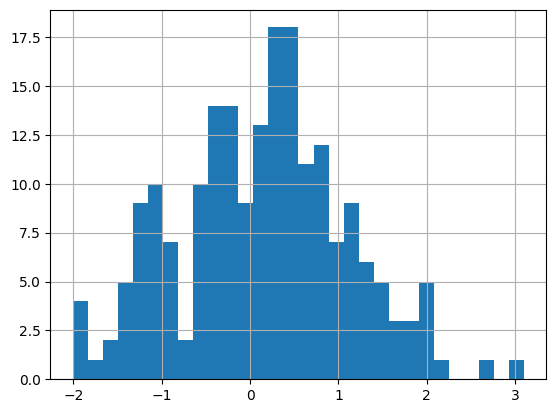

In [160]:
df['A'].hist(bins=30)

<Axes: ylabel='Frequency'>

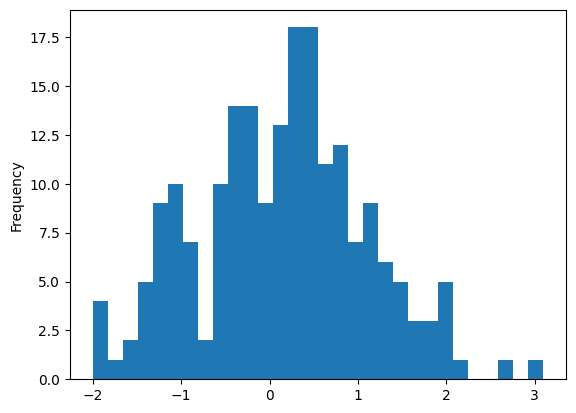

In [161]:
df['A'].plot(kind='hist',bins=30)

<Axes: >

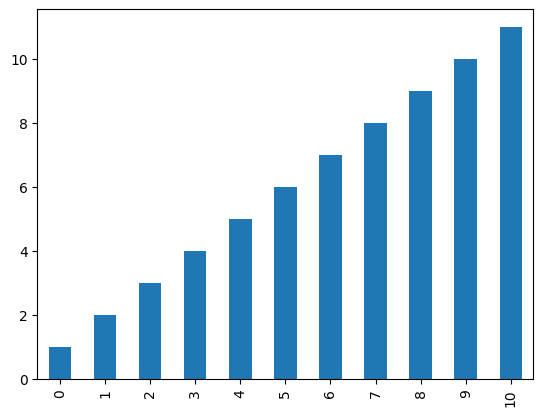

In [162]:
df['C'].loc[:10].plot(kind='bar')

<Axes: xlabel='B'>

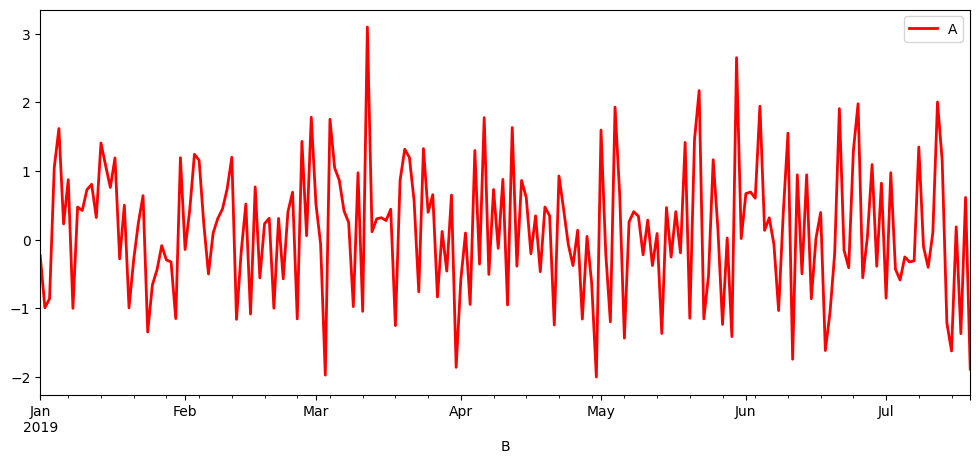

In [163]:
df.plot.line(x='B',y='A',figsize=(12,5), c='red',lw=2)